In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## 1. Data Normalization

In [2]:
df = pd.read_csv('data/data.csv')

df['text'] = df['text'].str.lower()
tokenizer = Tokenizer(num_words=10000) # Word limit
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
max_len = 500  # Set a maximum sequence length
data = pad_sequences(sequences, maxlen=max_len, padding='post')

labels = pd.get_dummies(df['source']).values

X_train, X_validate, y_train, y_validate = train_test_split(data, labels, test_size=0.1, random_state=42)

## 2. RNN architectures

In [3]:
def create_model(rnn_layer, units, activation, output_units, output_activation):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=100, input_length=max_len),
        rnn_layer(units, activation=activation, return_sequences=False),
        Dense(output_units, activation=output_activation)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_1 = create_model(SimpleRNN, 50, 'relu', y_train.shape[1], 'sigmoid')
model_2 = create_model(LSTM, 100, 'tanh', y_train.shape[1], 'sigmoid')
model_3 = create_model(GRU, 150, 'relu', y_train.shape[1], 'sigmoid')

c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## 3. Model Training

In [4]:
def train_and_save(model, name):
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_validate, y_validate))
    model.save(f'models/{name}.h5')
    return history

history1 = train_and_save(model_1, 'model_1')
history2 = train_and_save(model_2, 'model_2')
history3 = train_and_save(model_3, 'model_3')

Epoch 1/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 1202s 54ms/step - accuracy: 0.4568 - loss: 0.0591 - val_accuracy: 0.4762 - val_loss: 0.0500
Epoch 2/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 1199s 54ms/step - accuracy: 0.4764 - loss: 0.0499 - val_accuracy: 0.4792 - val_loss: 0.0501
Epoch 3/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 1197s 54ms/step - accuracy: 0.4769 - loss: 1456.9491 - val_accuracy: 0.4874 - val_loss: 0.0483
Epoch 4/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 1198s 54ms/step - accuracy: 0.4877 - loss: 0.0475 - val_accuracy: 0.4832 - val_loss: 0.0493
Epoch 5/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 1198s 54ms/step - accuracy: 0.4839 - loss: 163.6433 - val_accuracy: 0.4849 - val_loss: 0.0488


Epoch 1/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 3247s 146ms/step - accuracy: 0.4704 - loss: 0.0532 - val_accuracy: 0.6015 - val_loss: 0.0300
Epoch 2/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 3402s 153ms/step - accuracy: 0.6275 - loss: 0.0278 - val_accuracy: 0.6692 - val_loss: 0.0246
Epoch 3/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 3492s 157ms/step - accuracy: 0.6864 - loss: 0.0231 - val_accuracy: 0.6866 - val_loss: 0.0230
Epoch 4/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 3507s 158ms/step - accuracy: 0.7124 - loss: 0.0207 - val_accuracy: 0.6941 - val_loss: 0.0222
Epoch 5/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 3609s 163ms/step - accuracy: 0.7310 - loss: 0.0192 - val_accuracy: 0.7014 - val_loss: 0.0218


Epoch 1/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 8421s 379ms/step - accuracy: 0.5376 - loss: 0.0423 - val_accuracy: 0.6536 - val_loss: 0.0256
Epoch 2/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 8218s 370ms/step - accuracy: 0.6740 - loss: 0.0240 - val_accuracy: 0.6886 - val_loss: 0.0226
Epoch 3/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 8393s 378ms/step - accuracy: 0.7104 - loss: 0.0210 - val_accuracy: 0.7025 - val_loss: 0.0216
Epoch 4/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 8479s 382ms/step - accuracy: 0.7299 - loss: 0.0193 - val_accuracy: 0.7032 - val_loss: 0.0215
Epoch 5/5
22189/22189 ━━━━━━━━━━━━━━━━━━━━ 8742s 394ms/step - accuracy: 0.7447 - loss: 0.0182 - val_accuracy: 0.6991 - val_loss: 0.0221


## 4. Validation

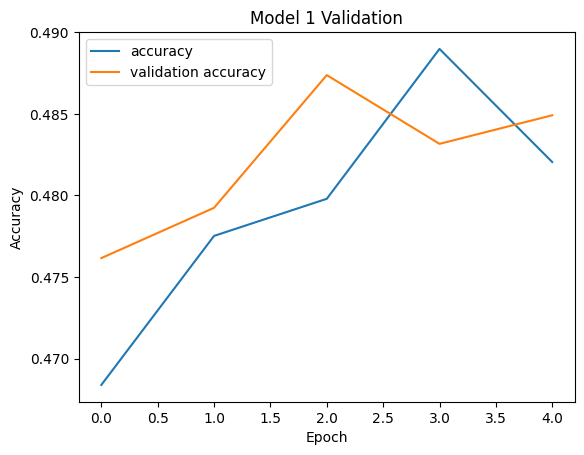

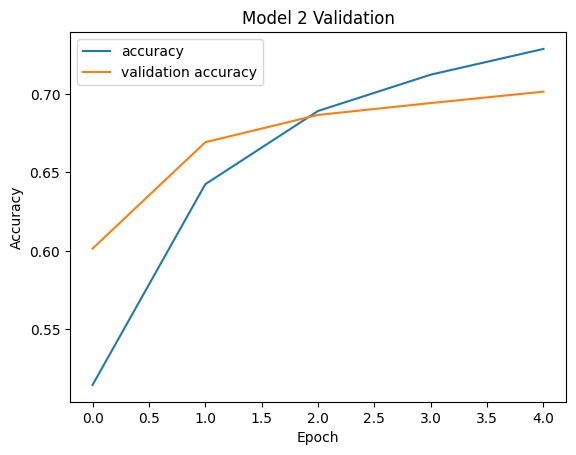

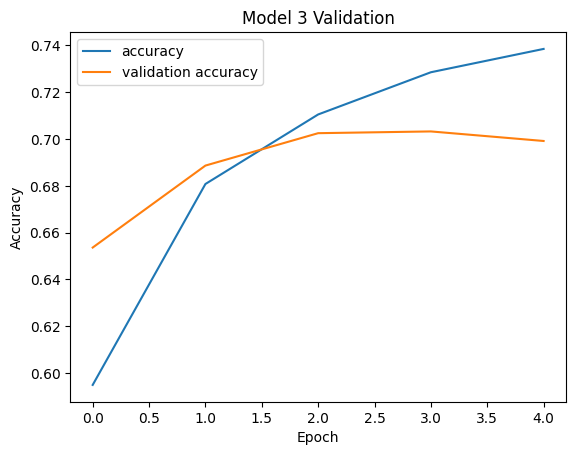

In [5]:
# Plot validation graphs
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history1, 'Model 1 Validation')
plot_history(history2, 'Model 2 Validation')
plot_history(history3, 'Model 3 Validation')